In [3]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [4]:


import requests
import pandas as pd
import io

# URL of the CSV file

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# Fetching the CSV file
response = requests.get(URL)
# Ensure the request was successful
if response.status_code == 200:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(io.StringIO(response.text))
    print('Data read into a pandas dataframe!')
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print(f"Failed to fetch the CSV file. Status code: {response.status_code}")


Data read into a pandas dataframe!
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0 

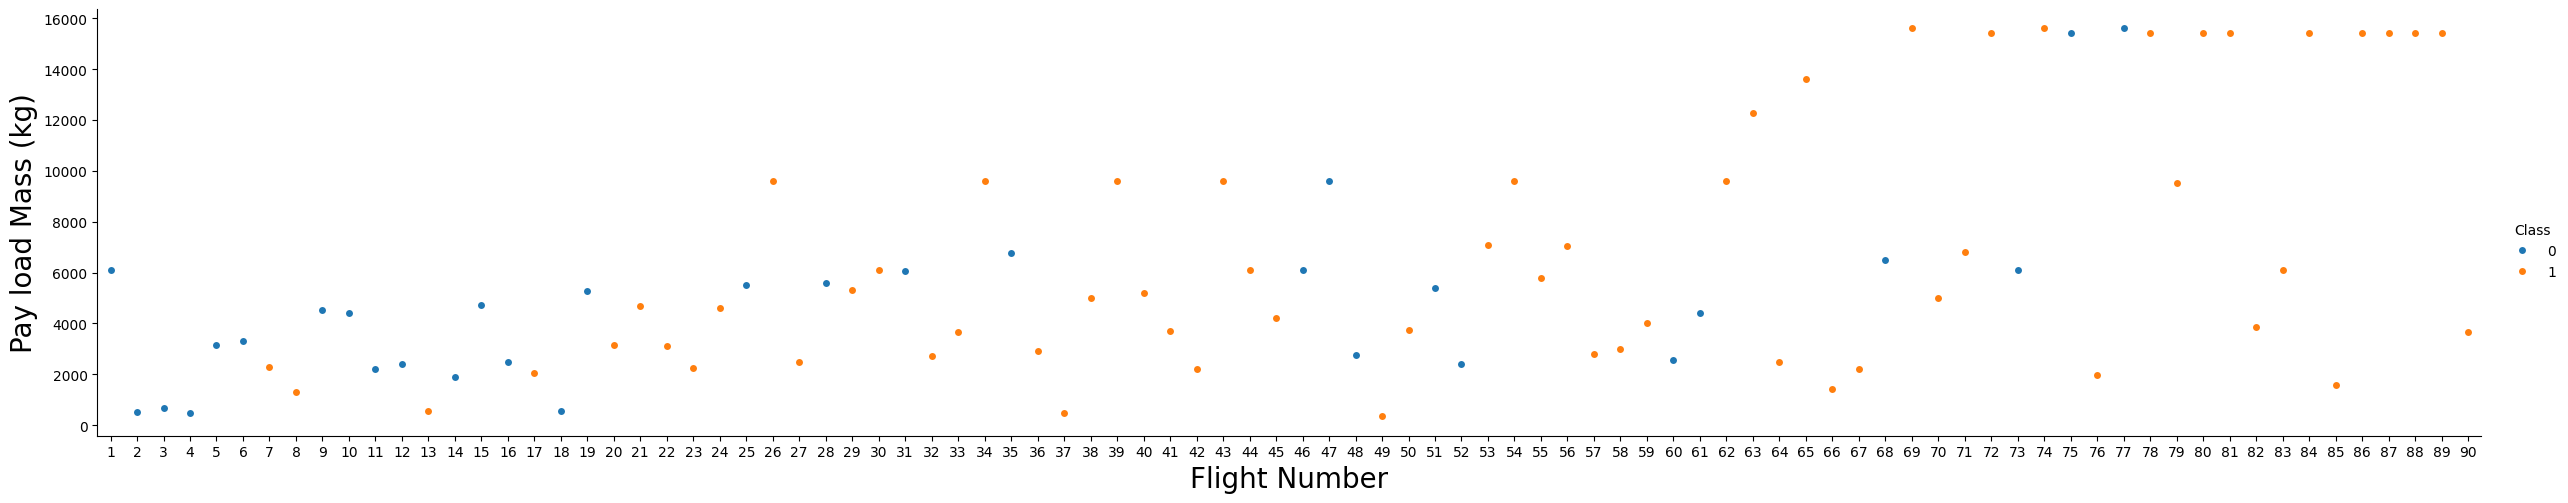

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

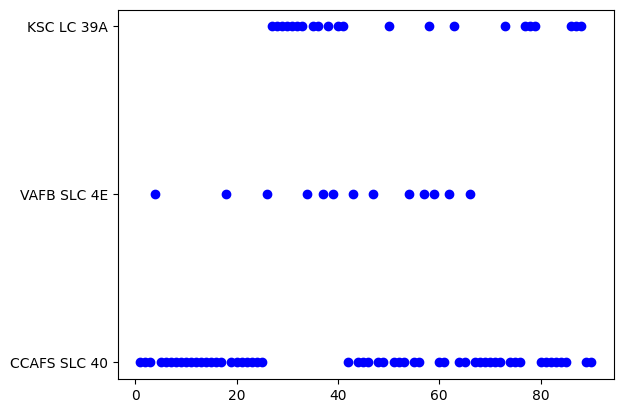

In [6]:
plt.scatter(df['FlightNumber'],df['LaunchSite'],color='blue')
plt.show()

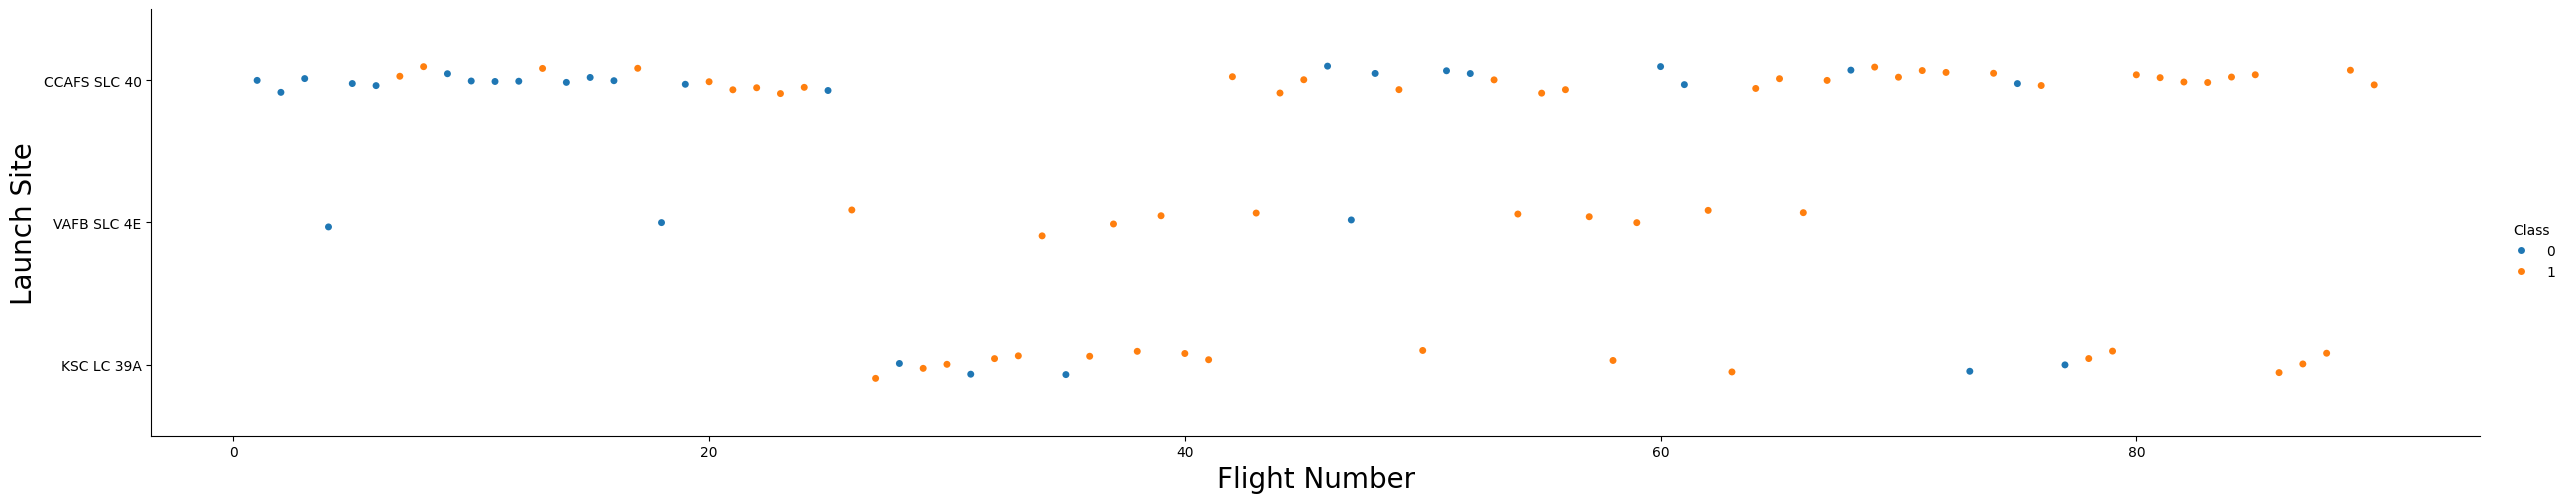

In [7]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

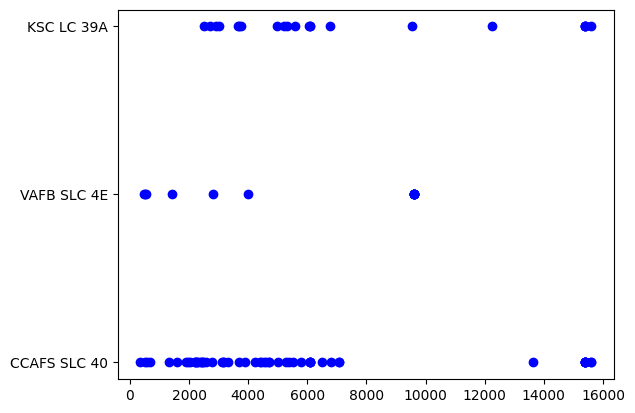

In [8]:
plt.scatter(df['PayloadMass'],df['LaunchSite'],color='blue')
plt.show()

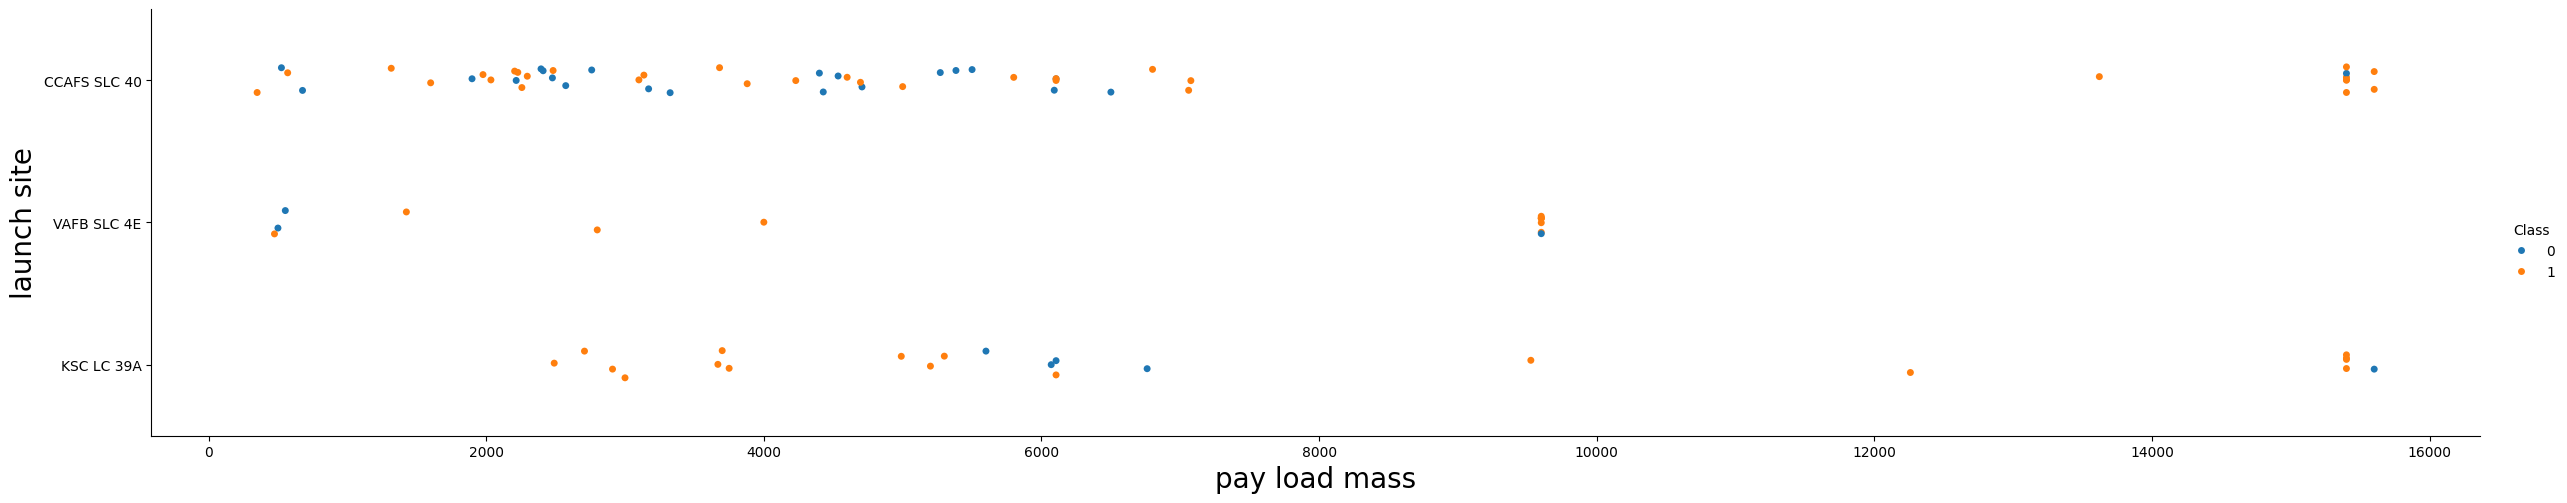

In [9]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("pay load mass",fontsize=20)
plt.ylabel("launch site",fontsize=20)
plt.show()

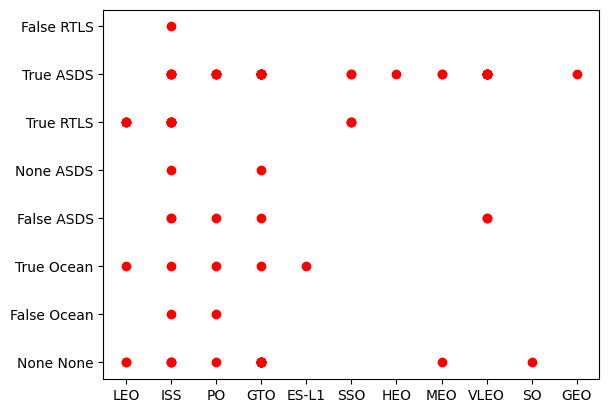

In [10]:
plt.scatter(df['Orbit'],df['Outcome'],color='red')
plt.show()

<BarContainer object of 11 artists>

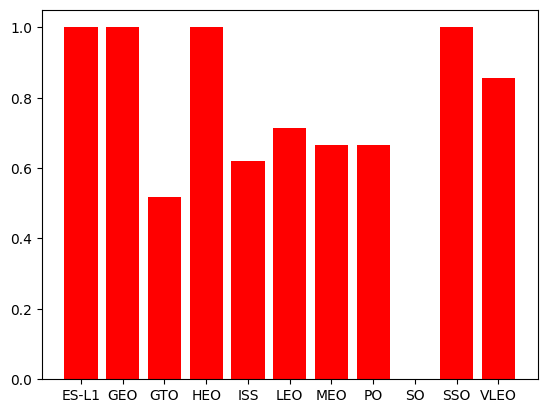

In [11]:
orbitS=df.groupby('Orbit')['Class'].mean().reset_index()
plt.bar(orbitS['Orbit'],orbitS['Class'],color='red')

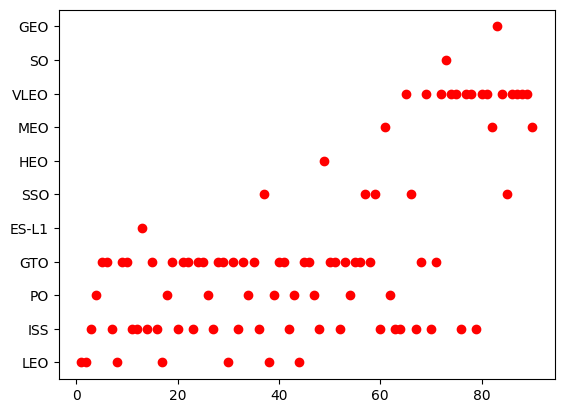

In [12]:
plt.scatter(df['FlightNumber'],df['Orbit'],color='red')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10100\1360283158.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.catplot(x='FlightNumber',y='Orbit',hue='Class',color='pink',data=df, aspect = 5)


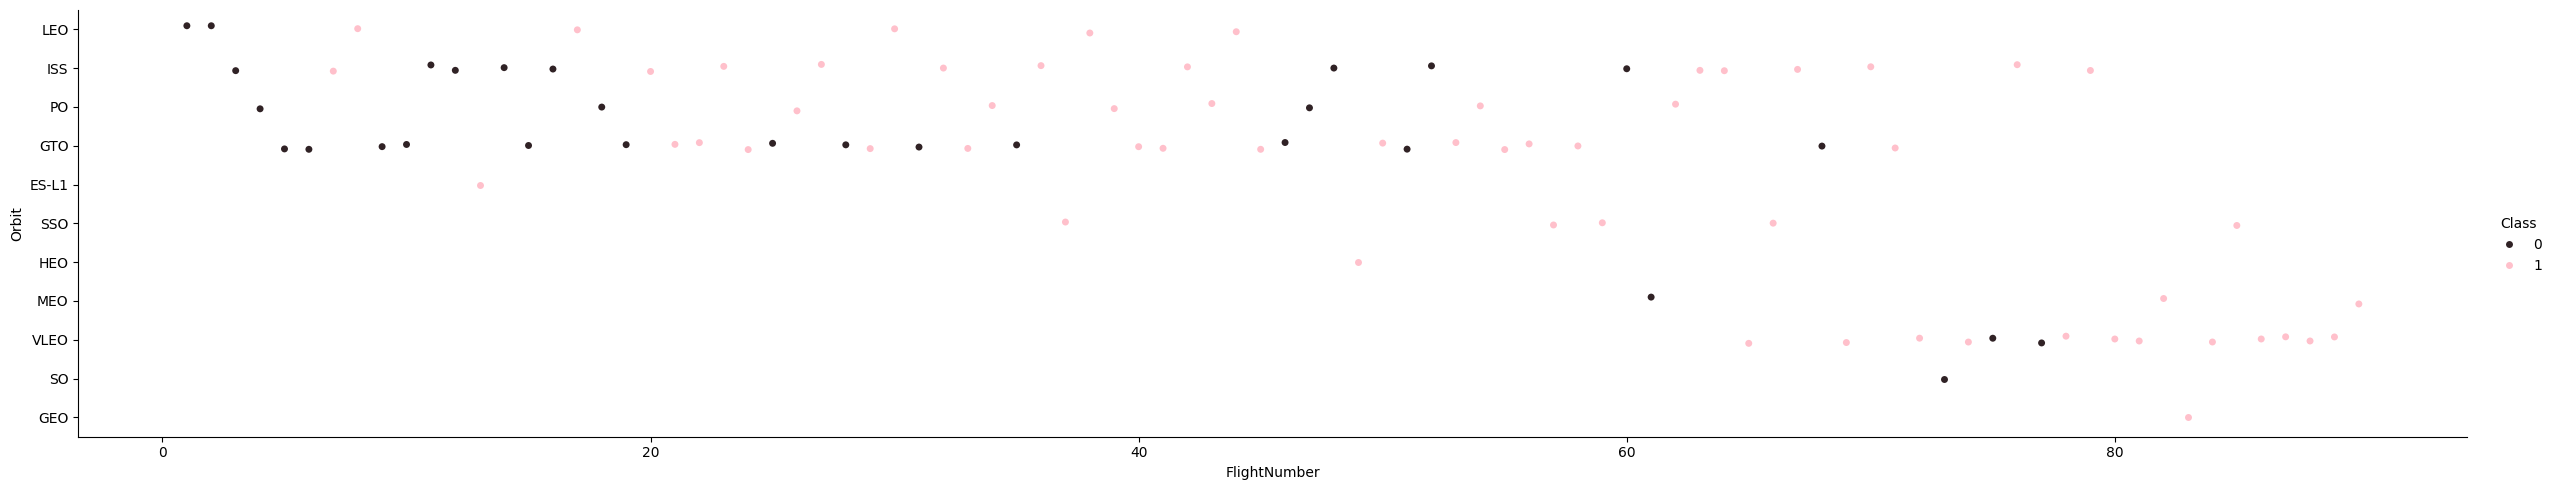

In [13]:
sns.catplot(x='FlightNumber',y='Orbit',hue='Class',color='pink',data=df, aspect = 5)


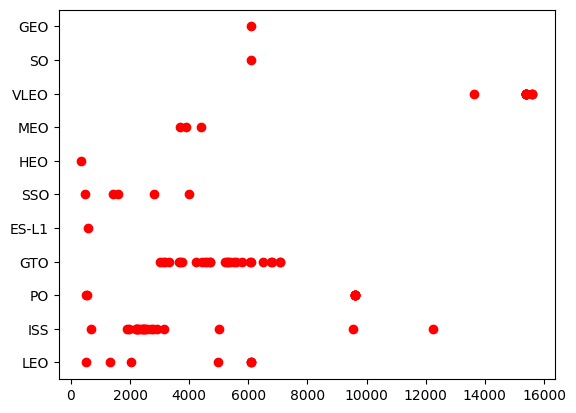

In [14]:
plt.scatter(df['PayloadMass'],df['Orbit'],color='red')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10100\1147948141.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.catplot(x='PayloadMass',y='Orbit',hue='Class',color='pink',data=df, aspect = 5)


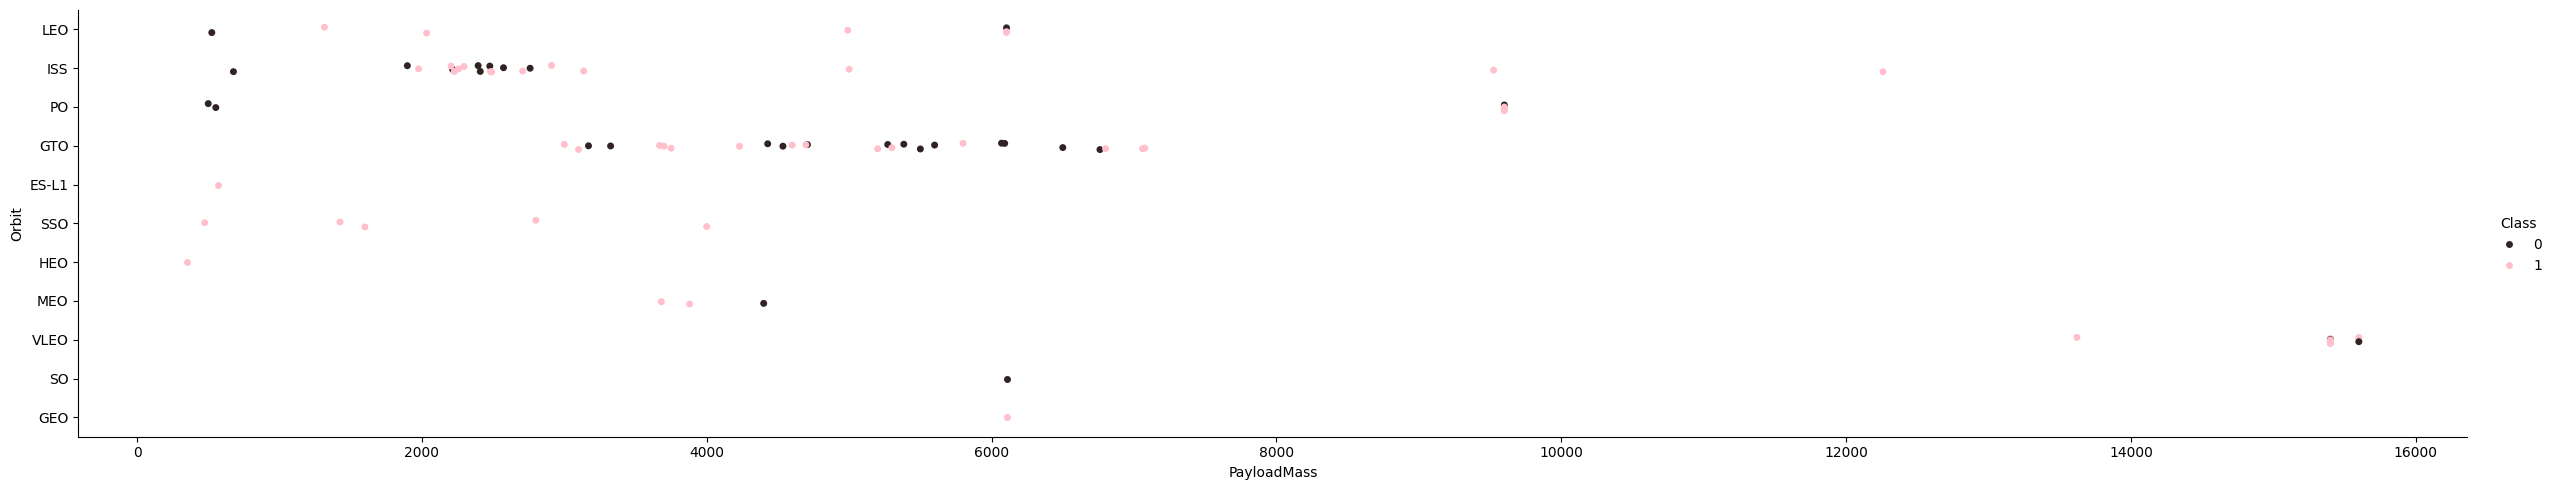

In [15]:
import seaborn as sns
sns.catplot(x='PayloadMass',y='Orbit',hue='Class',color='pink',data=df, aspect = 5)


In [16]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


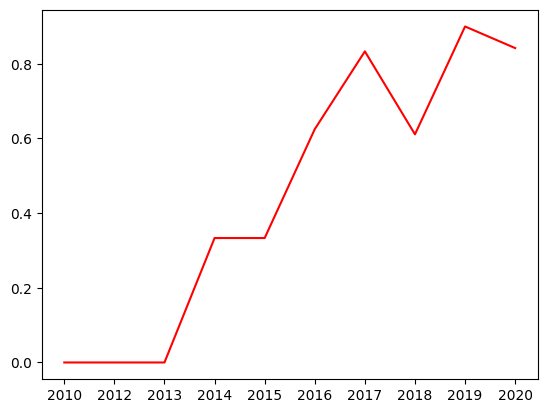

In [17]:
outcome=df.groupby('Date')['Class'].mean().reset_index()
plt.plot(outcome['Date'],outcome['Class'],color='red')

In [18]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.tail()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
85,86,15400.0,VLEO,KSC LC 39A,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060
86,87,15400.0,VLEO,KSC LC 39A,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058
87,88,15400.0,VLEO,KSC LC 39A,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051
88,89,15400.0,VLEO,CCAFS SLC 40,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060
89,90,3681.0,MEO,CCAFS SLC 40,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,0,B1062


In [19]:
orbit_dummies = pd.get_dummies(features['Orbit'], prefix='Orbit')
launchsite_dummies = pd.get_dummies(features['LaunchSite'], prefix='LaunchSite')
landingpad_dummies = pd.get_dummies(features['LandingPad'], prefix='LandingPad')
serial_dummies = pd.get_dummies(features['Serial'], prefix='Serial')

# Concatenate the original dataframe with the one-hot encoded columns
features_one_hot = pd.concat([df, orbit_dummies, launchsite_dummies, landingpad_dummies, serial_dummies], axis=1)

# Display the resulting dataframe
print(features_one_hot.tail())


    FlightNumber  Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
85            86  2020       Falcon 9      15400.0  VLEO    KSC LC 39A   
86            87  2020       Falcon 9      15400.0  VLEO    KSC LC 39A   
87            88  2020       Falcon 9      15400.0  VLEO    KSC LC 39A   
88            89  2020       Falcon 9      15400.0  VLEO  CCAFS SLC 40   
89            90  2020       Falcon 9       3681.0   MEO  CCAFS SLC 40   

      Outcome  Flights  GridFins  Reused  ...  Serial_B1048 Serial_B1049  \
85  True ASDS        2      True    True  ...         False        False   
86  True ASDS        3      True    True  ...         False        False   
87  True ASDS        6      True    True  ...         False        False   
88  True ASDS        3      True    True  ...         False        False   
89  True ASDS        1      True   False  ...         False        False   

    Serial_B1050  Serial_B1051 Serial_B1054  Serial_B1056  Serial_B1058  \
85         False       

In [20]:
dfa=features_one_hot.select_dtypes(include=['int','float']).columns
features_one_hot[dfa]=features_one_hot[dfa].astype('float64')
features_one_hot

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.0,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5.0,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2.0,True,True,...,False,False,False,False,False,False,False,False,True,False
86,87.0,2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3.0,True,True,...,False,False,False,False,False,False,True,False,False,False
87,88.0,2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6.0,True,True,...,False,False,False,True,False,False,False,False,False,False
88,89.0,2020,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3.0,True,True,...,False,False,False,False,False,False,False,False,True,False
